In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from pathlib import Path


In [2]:
BASE_PATH = Path(".")
TRAIN_PATH =  BASE_PATH / "train.csv"
TEST_PATH = BASE_PATH / "test.csv"
GENDER_SUBMISSION_PATH = BASE_PATH / "gender_submission.csv"

In [3]:
# load
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
gender_sub_df = pd.read_csv(GENDER_SUBMISSION_PATH)

```
train_df.shape=(891, 12)
test_df.shape=(418, 11)
```

```
PassengerId      int64 - Not suppose to be a feature
Survived         int64 - Label (1/0)
Pclass           int64 - Ticket class (1/2/3)
Name            object - Non trivial to help (Might cause data leakge)
Sex             object - (male/female)-> TODO convert
Age            float64 - age..
SibSp            int64 - # of siblings / spouses aboard the Titanic
Parch            int64 - # of parents / children aboard the Titanic	
Ticket          object - Non trivial to help, Ticket number 	
Fare           float64 - Passenger fare	
Cabin           object - Cabin number -> TODO convert
Embarked        object - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) -> TODO convert
```

```
[X] PassengerId - probably should be removed.. beacuse train consists of 1-891 and test 892-1309
[X] Survived - label
[?] Pclass - might combine with other features
[?] Name - Found socail_status feature(Mr/Mrs/Miss..), TOD search for common-names, or family-common-names.
[V] Sex - (might be conclude via Name) seems strong! Mostly males were board but more females survived. 
[V] Age - survivles chanes like follow: young kids > old people > middle age.
[?] SibSp - (might be conclude via Name)
[?] Parch - maybe say something combine with family name?
[?] Ticket - might be splited?
[?] Fare - seem interesting combined with age
[?] Cabin - A lot of nulls.. But give some info divided to A/B/C/D/E/F.. TODO read online about floors..
[?] Embarked - seem intertesting combined with female/male
```

In [4]:
# Show a sample of input_data

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(train_df.head(3).transpose())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(test_df.head(3).transpose())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gender_sub_df.head(3).transpose())

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.0,38.0,26.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925


,0,1,2
PassengerId,892,893,894
Pclass,3,3,2
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis"
Sex,male,female,male
Age,34.5,47.0,62.0
SibSp,0,1,0
Parch,0,0,0
Ticket,330911,363272,240276
Fare,7.8292,7.0,9.6875
Cabin,NaN,NaN,NaN


,0,1,2
PassengerId,892,893,894
Survived,0,1,0


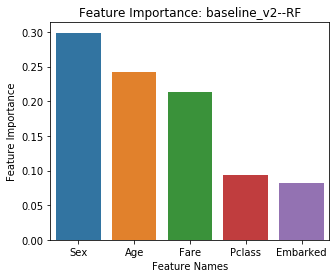

In [5]:
from IPython.display import Image
Image(filename='baseline_feature_importance.png')

Check best features ['Sex', 'Age', 'Fare']


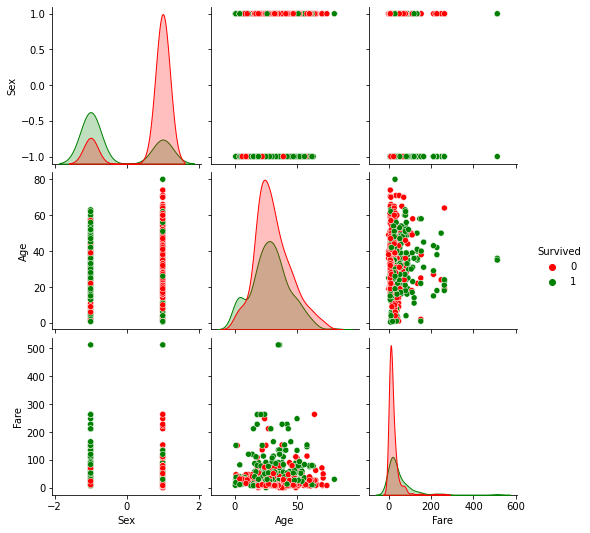

In [6]:
# It seems Age+Fare can tell something
df = train_df.copy()
df.Sex = df.Sex.map({"male": 1, "female": -1})
# df['age_func_fare'] = df.Age+df.Fare

interesting_cols = ['Survived', 'Sex', 'Age', 'Fare']
print("Check best features", interesting_cols[1:])
sns.pairplot(df[interesting_cols], hue='Survived', palette=["red", "green"])
_ = _

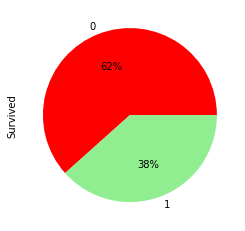

In [7]:
# About 40% survived
train_df.Survived.value_counts().plot.pie(autopct='%1.0f%%', colors=["red","lightgreen"])
_ = _ 

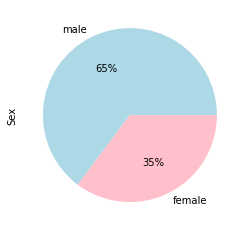

In [8]:
# About 65% of passengers were male
train_df.Sex.value_counts().plot.pie(autopct='%1.0f%%', colors=["lightblue","pink"])
_ = _ 

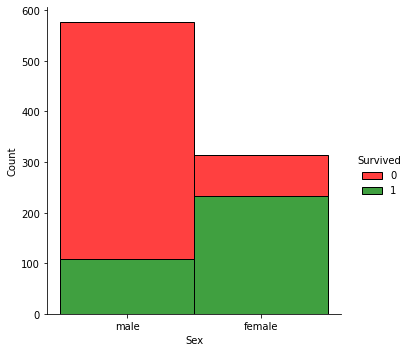

In [9]:
# Female had a bigger chance to survive
sns.displot(train_df, x='Sex',  hue='Survived', palette=["red", "green"], multiple="stack")

_ = _  


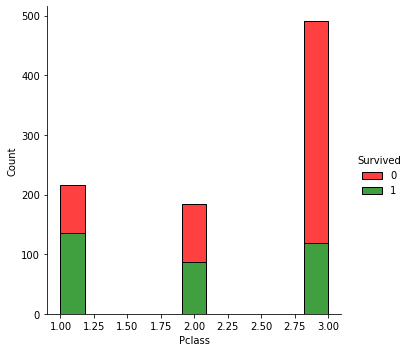

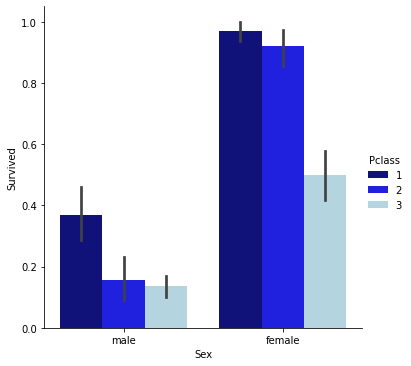

In [10]:
# The highest the pclass the non-survivels. In class 3 it most dramatical
sns.displot(train_df, x='Pclass',  hue='Survived', palette=["red", "green"], multiple="stack")

# Female+Pclass1/2 -> 0.85+ change to survive
# Male+Pclass2/3 -> 02- change to survive
sns.catplot(data=train_df, x="Sex", y="Survived", hue="Pclass", kind="bar",  palette=["darkblue", "blue", "lightblue"])
_ = _ 

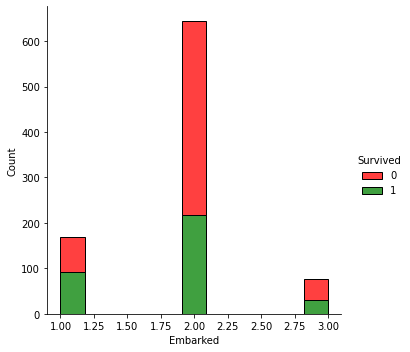

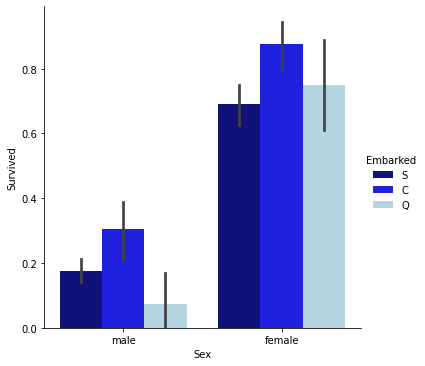

In [11]:
df = train_df.copy()
df.Embarked = df.Embarked.map({"C": 1, "S": 2, "Q": 3})
sns.displot(df, x='Embarked',  hue='Survived', palette=["red", "green"], multiple="stack")
sns.catplot(data=train_df, x="Sex", y="Survived", hue="Embarked", kind="bar",  palette=["darkblue", "blue", "lightblue"])
_=_

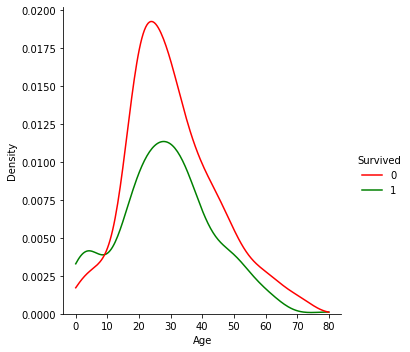

In [12]:
# Young kids (0-10) tends to survive.
# Old people (15-45) tends to not-survive :(
# Old people (50-90) tends to have 50-50 chance to survive.
sns.displot(train_df, x='Age',  hue='Survived', palette=["red", "green"], kind="kde", clip=(0.0, 80.0))
_ = _ 

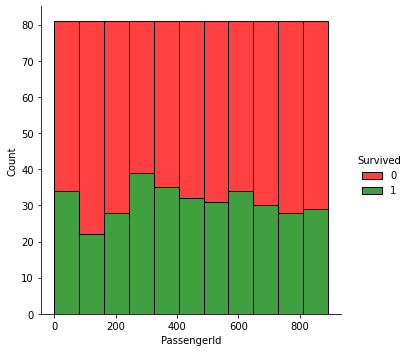

In [13]:
# This might improve results but practically should not be used.. Beacuse train indexing is nothing to test indexing..
sns.displot(train_df, x='PassengerId',  hue='Survived', palette=["red", "green"], multiple="stack")
_ = _ 


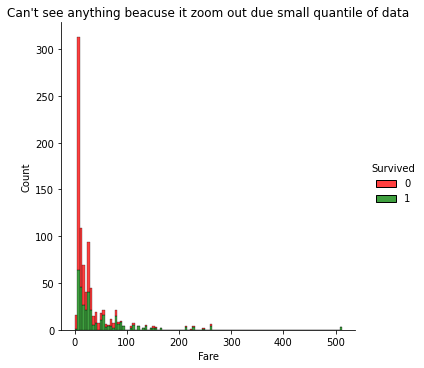

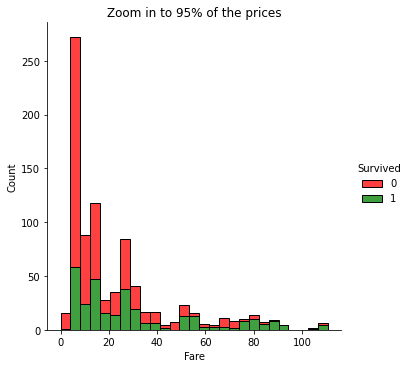

In [14]:
sns.displot(train_df, x='Fare',  hue='Survived', palette=["red", "green"], multiple="stack").set_titles("admaskdjasdljkaskjdsad")
plt.title("Can't see anything beacuse it zoom out due small quantile of data")
sns.displot(train_df[train_df.Fare < train_df.Fare.quantile(0.95)], x='Fare',  hue='Survived', palette=["red", "green"], multiple="stack")
plt.title("Zoom in to 95% of the prices")

_=_


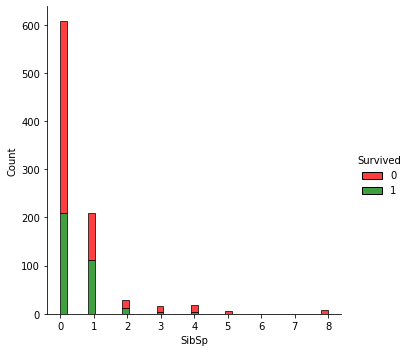

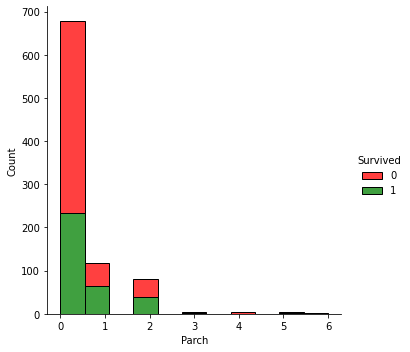

In [15]:
for col_name in ['SibSp', 'Parch']:
    sns.displot(train_df, x=col_name,  hue='Survived', palette=["red", "green"], multiple="stack")

In [16]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Exploration Name

train_df
test_df
all_df = pd.concat([train_df, test_df])

def extract_words(name):
    splitted_words = name.split(" ")
    splitted_words = [w for w in splitted_words if "." in w]
    # TODO remove any non a-zA-Z chars
    return splitted_words

def print_social_status(df):
    all_words = []
    for name in df.Name:
        for word in name.split(" "):
            if "." in word:
                all_words.append(word)
    print(f"possible social status: {set(all_words)}")
        

def print_common_words(df, threshold):
    threshold = int(df.shape[0]*threshold)
    print(f"Check {df.shape[0]} records --> threshold={threshold}")
    all_words = []
    for name in df.Name:
#     print("------")
#     print(name)
#     print(extract_words(name))
        for w in name.split(" "):
            all_words.append(w)
    all_words_df = pd.DataFrame(all_words)
    print(all_words_df.value_counts()[all_words_df.value_counts()>threshold])
    

print_social_status(all_df)
print()
print_common_words(all_df, 0.01)

possible social status: {'Mr.', 'Sir.', 'Dona.', 'Miss.', 'Mrs.', 'Jonkheer.', 'Major.', 'Dr.', 'Countess.', 'Master.', 'Don.', 'Col.', 'Mme.', 'Rev.', 'Lady.', 'L.', 'Mlle.', 'Capt.', 'Ms.'}

Check 1309 records --> threshold=13
Mr.          757
Miss.        260
Mrs.         197
William       85
John          72
Master.       61
Henry         47
Charles       38
James         37
George        35
Joseph        31
Thomas        31
Edward        28
Johan         22
Arthur        20
Samuel        20
Frederick     20
Alfred        18
Robert        17
Alexander     17
Mary          16
Elizabeth     16
Richard       15
Karl          14
Albert        14
Jr            14
dtype: int64


In [18]:
# Exploration Ticket
# for ticket in train_df.Ticket:
#     print(ticket)
    
train_df
test_df
all_df = pd.concat([train_df, test_df])


def print_social_status(df):
    all_words = []
    for name in df.Ticket:
        for word in name.split(" "):
            if "." in word:
                all_words.append(word)
    print(f"possible social status: {set(all_words)}")
        

def print_common_words(df, threshold):
    threshold = int(df.shape[0]*threshold)
    print(f"Check {df.shape[0]} records --> threshold={threshold}")
    all_words = []
    for name in df.Ticket:
#     print("------")
#     print(name)
#     print(extract_words(name))
        for w in name.split(" "):
            w = w.replace(".", "")
#             for w in w.split("/"):
            all_words.append(w)
    all_words_df = pd.DataFrame(all_words)
    print(all_words_df.value_counts()[all_words_df.value_counts()>threshold])
    

# print_social_status(all_df)
print()
print_common_words(all_df, 0.005)


Check 1309 records --> threshold=6
PC          92
CA          68
A/5         25
SOTON/OQ    24
2           17
W/C         15
STON/O      14
SC/PARIS    14
2343        11
A/4          9
FCC          9
C            8
1601         8
2144         8
14879        7
17608        7
3101295      7
347082       7
SO/PP        7
347077       7
SOC          7
STON/O2      7
dtype: int64


In [19]:
# Exploration Cabin
# 1000 out of 1300 is Nan!!
all_df = pd.concat([train_df, test_df]).copy()

def find_floor(cabin):
    possible_floor = []
    floors = ["A", "B", "C", "D", "E", "F", "G"]
    for f in floors:
        if f in cabin:
            possible_floor.append(f)
    if len(set(possible_floor)) == 1:
            return possible_floor[0] 
    elif len(set(possible_floor)) >1:
        ret = ''.join(possible_floor)
        print(f"Not sure what to do: find_floor ({cabin}), return \"{ret}\"")
        return ret
    else:
        print(f"Failed: find_floor ({cabin})")
        return None
    
    
all_df["CabinFloor"] = all_df.Cabin.map(lambda x: find_floor(x), na_action='ignore')

print("-"*30)
val_count_cabin = all_df.CabinFloor.value_counts(dropna=False)
print(val_count_cabin[val_count_cabin>2])

print("-"*30)
val_count_cabin = all_df.Cabin.value_counts(dropna=False)
print(val_count_cabin[val_count_cabin>2])


Not sure what to do: find_floor (F G73), return "FG"
Not sure what to do: find_floor (F E69), return "EF"
Failed: find_floor (T)
Not sure what to do: find_floor (F G63), return "FG"
Not sure what to do: find_floor (F G73), return "FG"
Not sure what to do: find_floor (F G63), return "FG"
Not sure what to do: find_floor (F E46), return "EF"
Not sure what to do: find_floor (F E57), return "EF"
------------------------------
NaN    1015
C        94
B        65
D        46
E        41
A        22
F        14
G         5
FG        4
EF        3
Name: CabinFloor, dtype: int64
------------------------------
NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
B96 B98               4
F2                    4
C22 C26               4
D                     4
F4                    4
F33                   4
C78                   4
B51 B53 B55           3
E34                   3
B58 B60               3
E101                  3
C101                  3
A34      